In [5]:
# constant
DF_PATH = "../data/processed/1_preprocessed_df.pkl"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [6]:
# Read Data 
df = pd.read_pickle(DF_PATH)

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3277675,2,2020-01-17 14:22:52,2020-01-17 14:30:41,2,1.28,1,N,170,113,1.0,7.5,0.0,0.5,1.50,0.0,0.3,12.30,2.5
86746,2,2020-01-01 12:37:41,2020-01-01 12:51:38,1,3.05,1,N,144,164,2.0,12.5,0.0,0.5,0.00,0.0,0.3,15.80,2.5
3103341,2,2020-01-16 19:30:54,2020-01-16 19:44:12,1,1.82,1,N,236,238,1.0,10.5,1.0,0.5,1.00,0.0,0.3,15.80,2.5
453379,1,2020-01-03 18:29:54,2020-01-03 18:35:40,2,1.00,1,N,141,170,1.0,6.0,3.5,0.5,0.52,0.0,0.3,10.82,2.5
1478017,1,2020-01-09 08:22:30,2020-01-09 08:29:04,1,1.10,1,N,164,162,1.0,6.5,2.5,0.5,1.95,0.0,0.3,11.75,2.5


In [8]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000,989898.000000
mean,1.670333,1.514719,2.850759,1.059378,164.976221,163.085505,1.270485,12.496063,1.096561,0.493769,2.211378,0.335096,0.297956,18.471614,2.297514
std,0.470093,1.151726,3.764111,0.765607,65.423864,69.744763,0.473912,11.798230,1.250206,0.067910,2.696905,1.816081,0.034177,14.511689,0.704266
min,1.000000,0.000000,-9.290000,1.000000,1.000000,1.000000,1.000000,-730.000000,-4.500000,-0.500000,-27.000000,-35.740000,-0.300000,-730.300000,-2.500000
25%,1.000000,1.000000,0.960000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.160000,2.500000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.950000,0.000000,0.300000,14.160000,2.500000
75%,2.000000,2.000000,2.900000,1.000000,234.000000,234.000000,2.000000,13.500000,2.500000,0.500000,2.860000,0.000000,0.300000,19.560000,2.500000
max,2.000000,9.000000,262.880000,99.000000,265.000000,265.000000,4.000000,750.000000,13.500000,3.300000,300.880000,831.750000,0.300000,914.550000,2.750000


# plot distributions

- trip_distance, fare_amount, total_amount

## distance

<AxesSubplot:ylabel='trip_distance'>

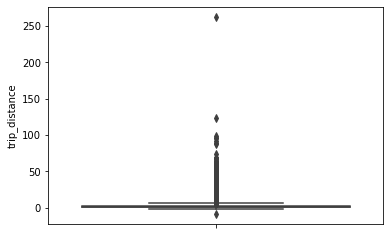

In [17]:
# the min of destance is negative .!
# distance 
sns.boxplot(data=df,y='trip_distance')

In [20]:
df.trip_distance.min() , df.trip_distance.max()

(-9.29, 262.88)

In [24]:
df[df["trip_distance"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1779382,2,2020-01-10 15:52:10,2020-01-10 16:00:22,1,-1.44,5,N,193,145,1.0,10.20,0.0,0.5,1.65,0.00,0.3,14.60,0.0
787926,2,2020-01-05 15:36:50,2020-01-05 16:07:07,1,-9.29,5,N,225,233,2.0,21.41,0.0,0.5,0.00,12.24,0.3,34.45,0.0


 ### we have some problems with distance:
    - outlier in min and max
    - negative numbers
    - big std

## fare_amount

<AxesSubplot:ylabel='fare_amount'>

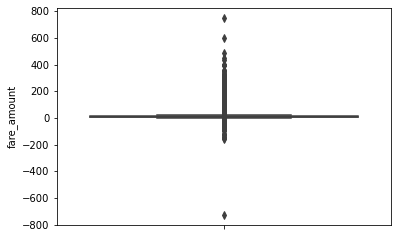

In [136]:
sns.boxplot(data=df,y='fare_amount')

In [138]:
df[df["fare_amount"] < 0].count()

VendorID                 3076
tpep_pickup_datetime     3076
tpep_dropoff_datetime    3076
passenger_count          3076
trip_distance            3076
RatecodeID               3076
store_and_fwd_flag       3076
PULocationID             3076
DOLocationID             3076
payment_type             3076
fare_amount              3076
extra                    3076
mta_tax                  3076
tip_amount               3076
tolls_amount             3076
improvement_surcharge    3076
total_amount             3076
congestion_surcharge     3076
trip_time                3076
dtype: int64

> 3076 have negative numbers .!

In [139]:
df.fare_amount.median()

9.0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


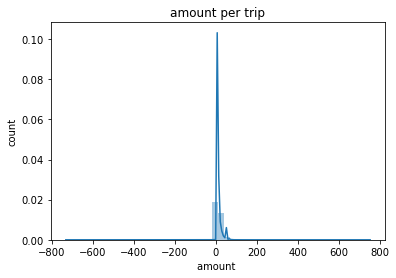

In [ ]:
sns.distplot(df.fare_amount);


# Add title and axis names
plt.title('amount per trip')
plt.xlabel('amount ')
plt.ylabel('count')

# plot
plt.show()

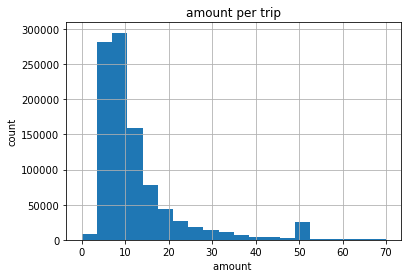

In [145]:
df.fare_amount.hist(bins=20,range=(0, 70))


# Add title and axis names
plt.title('amount per trip')
plt.xlabel('amount ')
plt.ylabel('count')

# plot
plt.show()

> most of pepole ranged from 0 to 80 doller

In [149]:
df[df['fare_amount'] > 55 ].count()

VendorID                 8016
tpep_pickup_datetime     8016
tpep_dropoff_datetime    8016
passenger_count          8016
trip_distance            8016
RatecodeID               8016
store_and_fwd_flag       8016
PULocationID             8016
DOLocationID             8016
payment_type             8016
fare_amount              8016
extra                    8016
mta_tax                  8016
tip_amount               8016
tolls_amount             8016
improvement_surcharge    8016
total_amount             8016
congestion_surcharge     8016
trip_time                8016
dtype: int64

In [153]:
df[df['fare_amount'] < 0 ].count()[1]

3076

In [151]:
df['fare_amount'].count()

989898

In [158]:
df[((df['fare_amount'] > 0)  & (df['fare_amount'] < 50 ))]['fare_amount'].describe()

count    951721.000000
mean         10.940081
std           7.223957
min           0.010000
25%           6.500000
50%           8.500000
75%          13.000000
max          49.700000
Name: fare_amount, dtype: float64

In [155]:
df[((df['fare_amount'] < 0)  | (df['fare_amount'] > 55 ))].count()

VendorID                 11092
tpep_pickup_datetime     11092
tpep_dropoff_datetime    11092
passenger_count          11092
trip_distance            11092
RatecodeID               11092
store_and_fwd_flag       11092
PULocationID             11092
DOLocationID             11092
payment_type             11092
fare_amount              11092
extra                    11092
mta_tax                  11092
tip_amount               11092
tolls_amount             11092
improvement_surcharge    11092
total_amount             11092
congestion_surcharge     11092
trip_time                11092
dtype: int64

> we can take all the out of this range as outlier

## time

In [105]:
time_expand =  df.tpep_dropoff_datetime -  df.tpep_pickup_datetime

In [108]:
time_expand = time_expand.dt.total_seconds()

In [117]:
time_expand.describe()

count    989898.000000
mean        946.113512
std        3765.778305
min           0.000000
25%         380.000000
50%         624.000000
75%         999.000000
max       86380.000000
dtype: float64

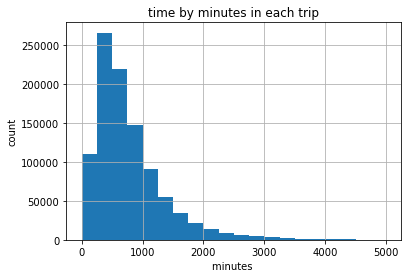

In [125]:
time_expand.hist(bins=20,range=(0, 5000))


# Add title and axis names
plt.title('time by minutes in each trip')
plt.xlabel('minutes ')
plt.ylabel('count')

# plot
plt.show()

> big standard deveation > we need to treat with outlier again

In [118]:
# fare_amount >> we will reuren to it leter

# correlation

In [132]:
# add time expand in the datafram
df["trip_time"] = time_expand

<AxesSubplot:>

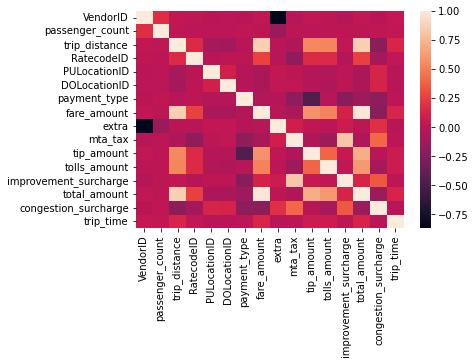

In [133]:
sns.heatmap(df.corr())

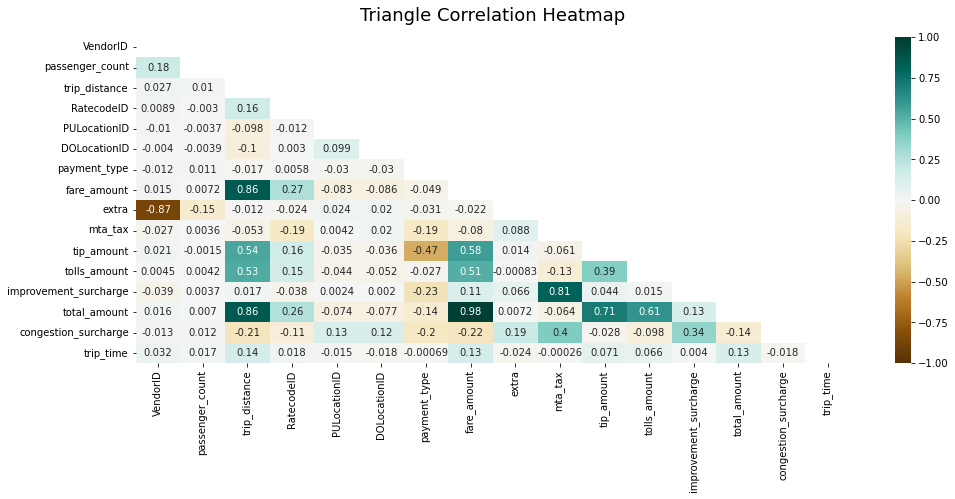

In [135]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

> we have some confusion with the time should be postive correlated like distance